### Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Data Understanding

In [43]:
df = pd.read_csv('College.csv')
df.rename(columns = {'Unnamed: 0':'University'}, inplace=True)
df.head(3)

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [44]:
df.shape

(777, 19)

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [46]:
df.describe(exclude='number')

,University,Private
count,777,777
unique,777,2
top,Abilene Christian University,Yes
freq,1,565


## EDA

In [47]:
df.duplicated().any()

False

In [48]:
df.isna().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Cleaning Data

In [49]:
private = {"No": 0, "Yes": 1}
data = [df]

for dataset in data:
    dataset['Private'] = dataset['Private'].map(private)

## Visualization

In [50]:
df.columns

Index(['University', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

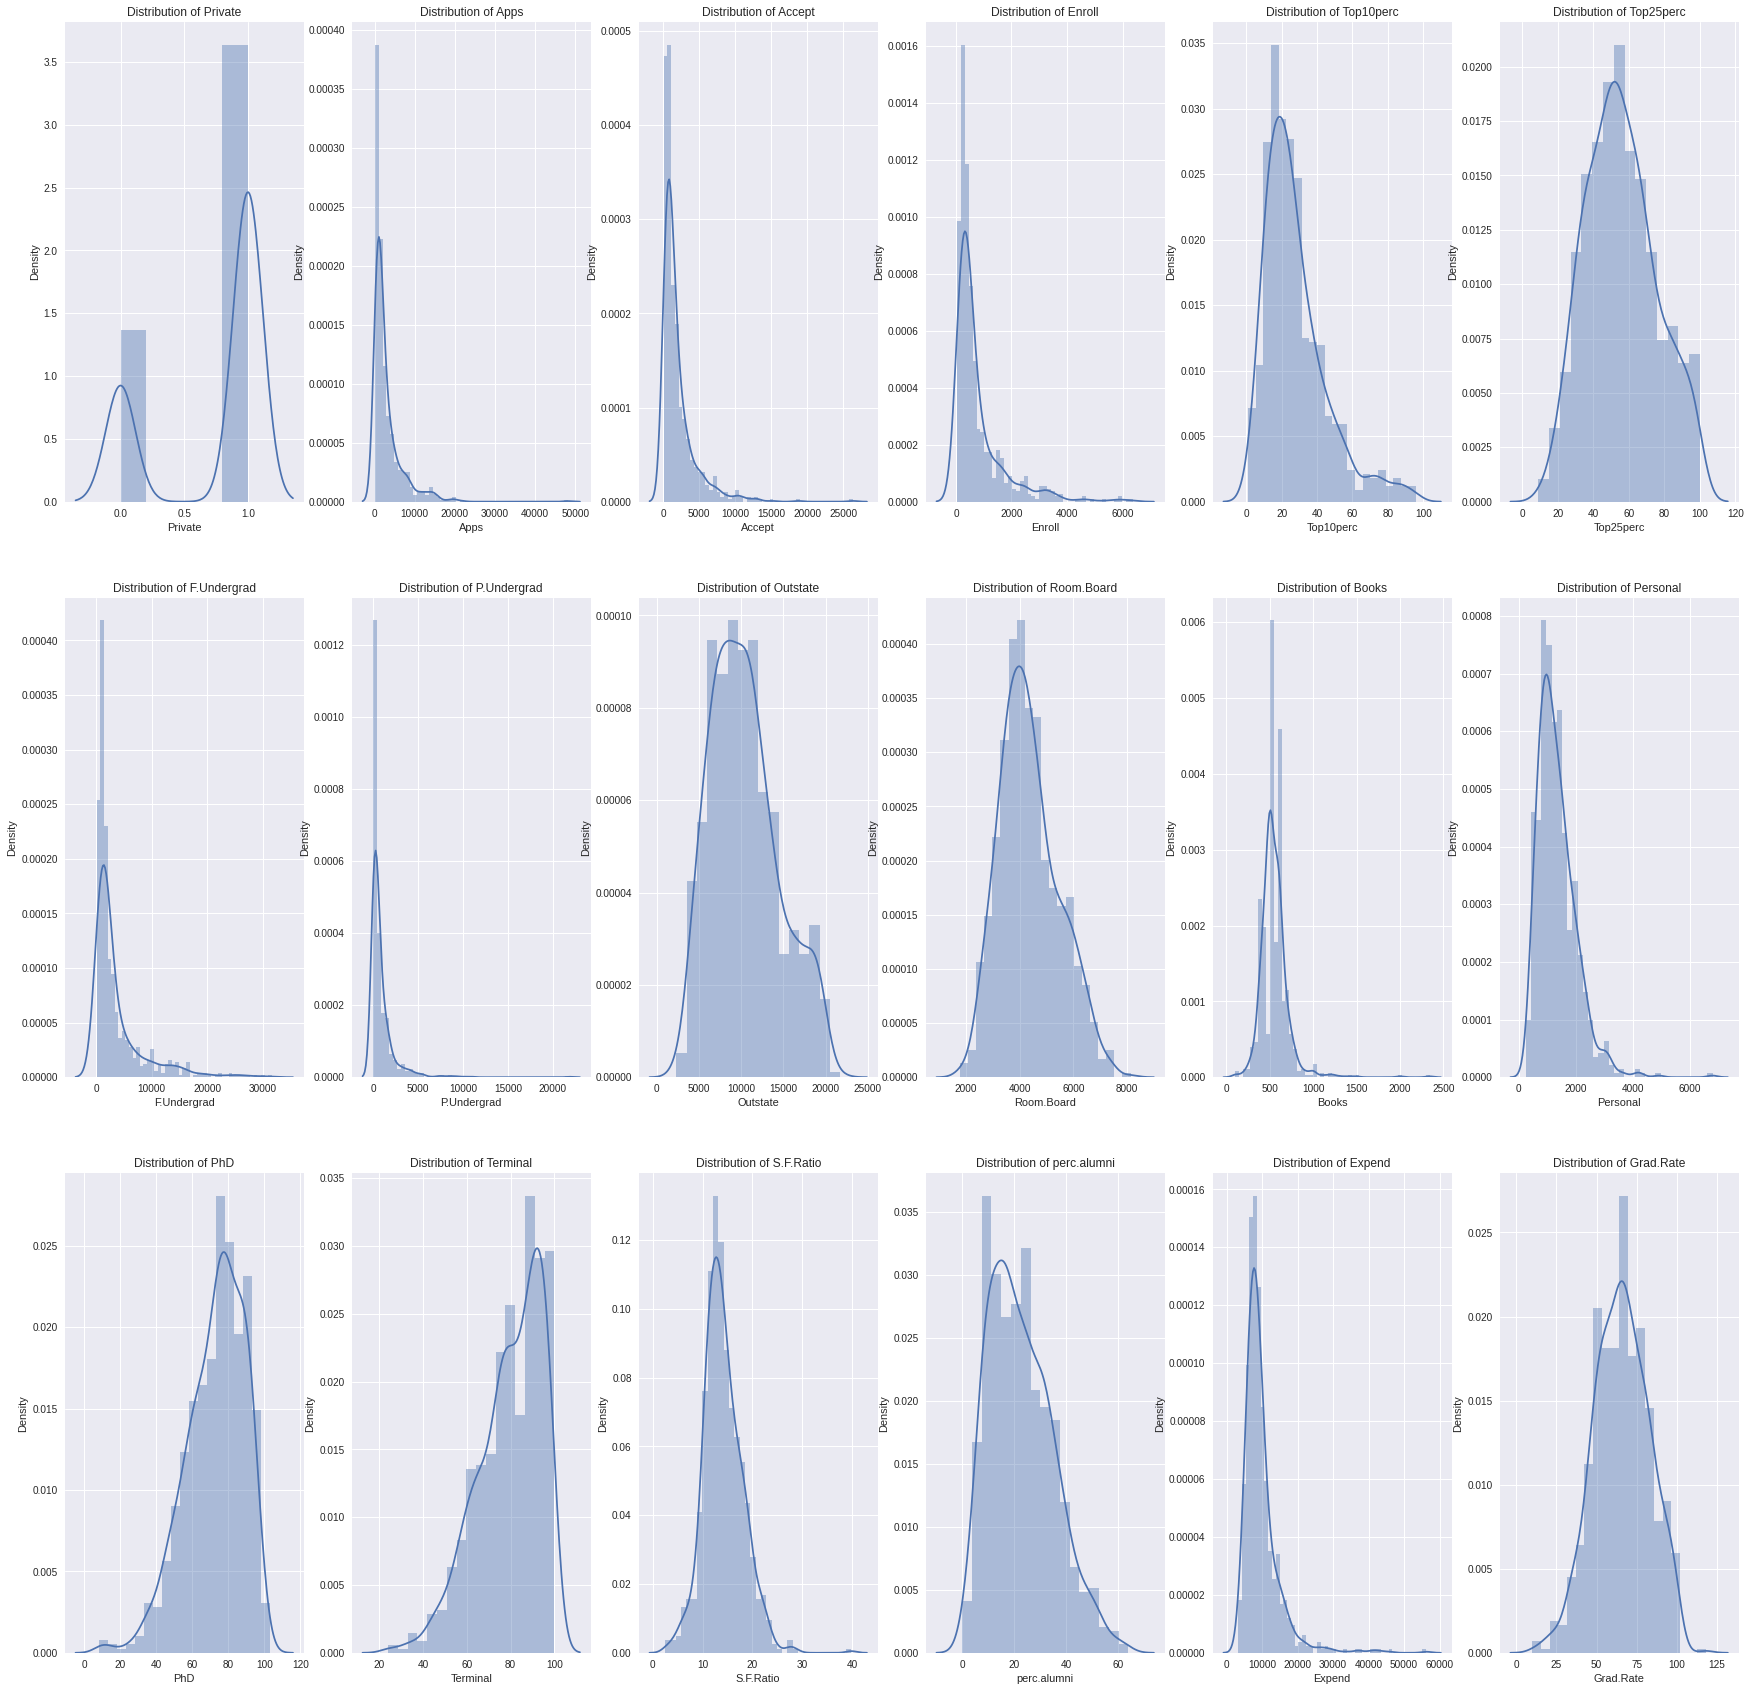

In [51]:
plt.style.use('seaborn')
plt.figure(figsize=(30,30))
n=1
for i in df.columns[1:]:
  plt.subplot(3,6,n)
  sns.distplot(df[i])
  plt.title(f'Distribution of {i}')
  n+=1
plt.show()

In [52]:
df = df.copy().iloc[:,2:] 
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


## Scaling

In [53]:
scaler = MinMaxScaler()
df_new = scaler.fit_transform(df)

In [54]:
df_final = pd.DataFrame(df_new)
df_final.columns = df.columns

In [55]:
df_final

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074


## Defining Number of Cluster (K) Using Elbow Method

In [56]:
inertia = []
for i in range(1,9):
  model = KMeans(n_clusters=i, random_state=42)
  model.fit(df_final)
  inertia.append(model.inertia_)
inertia

[300.278227351332,
 215.76959285580534,
 177.80560305981152,
 155.33050599648658,
 141.30286736285694,
 133.00905328153289,
 126.80130736035932,
 120.67580216984082]

In [57]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1,9)])
inertia_df

,Inertia
1,300.278227
2,215.769593
3,177.805603
4,155.330506
5,141.302867
6,133.009053
7,126.801307
8,120.675802


Text(0.5, 1.0, 'Elbow Method')

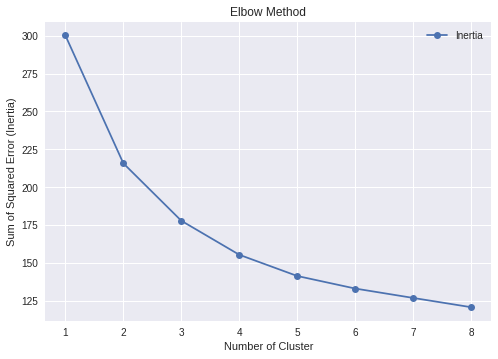

In [58]:
inertia_df.plot(kind='line', marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.title('Elbow Method')

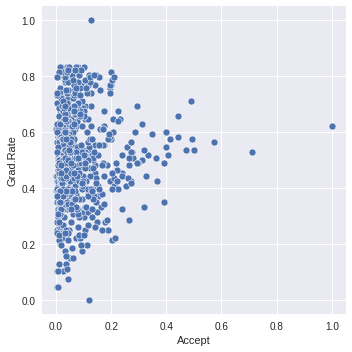

In [59]:
sns.relplot(x='Accept',y='Grad.Rate',data=df_final)

## Fitting Model KMeans

In [60]:
modelKM = KMeans(n_clusters=3, random_state=42)
modelKM.fit(df_final)

KMeans(n_clusters=3, random_state=42)

In [61]:
modelKM.predict(df_final)

array([2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,

In [62]:
df_final['Cluster KM'] = modelKM.predict(df_final)
df_final

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster KM
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,2
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,2
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,2
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,1
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778,2
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926,2
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111,2
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074,1


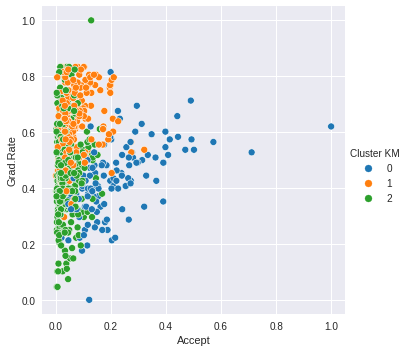

In [63]:
sns.relplot(x='Accept',y='Grad.Rate',data=df_final, hue='Cluster KM', palette='tab10')

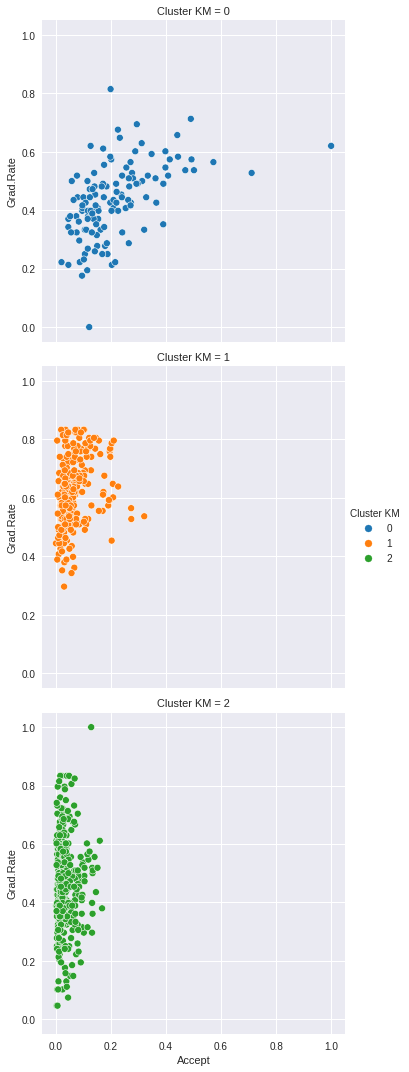

In [64]:
sns.relplot(x='Accept',y='Grad.Rate',data=df_final, hue='Cluster KM', palette='tab10', row='Cluster KM')

In [65]:
modelKM.cluster_centers_

array([[0.17154259, 0.21652572, 0.36823517, 0.27614601, 0.56265509,
        0.39232217, 0.13143444, 0.26710086, 0.34460933, 0.219794  ,
        0.24503324, 0.78667233, 0.85229202, 0.38934533, 0.22719254,
        0.09867649, 0.43361708],
       [0.06068287, 0.06618703, 0.08879347, 0.43770262, 0.69573392,
        0.07225107, 0.01420018, 0.62673145, 0.52463631, 0.20628224,
        0.13223812, 0.8051631 , 0.87342405, 0.24967635, 0.50386169,
        0.19664798, 0.62955922],
       [0.02572861, 0.03423455, 0.05651876, 0.1740081 , 0.37647225,
        0.05172969, 0.026584  , 0.326061  , 0.34610049, 0.19353718,
        0.16465571, 0.56294197, 0.60023617, 0.32687839, 0.29599359,
        0.07916768, 0.46073124]])

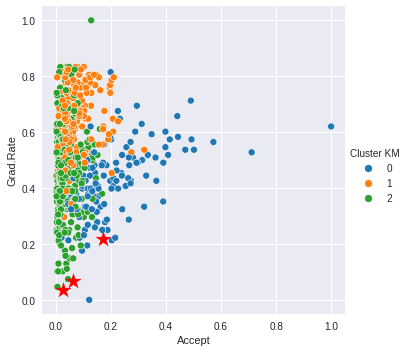

In [66]:
sns.relplot(x='Accept',y='Grad.Rate',data=df_final, hue='Cluster KM', palette='tab10')
plt.scatter(modelKM.cluster_centers_[:,0], modelKM.cluster_centers_[:,1], color='red', marker='*', s=250)

## Hierarchical Clustering

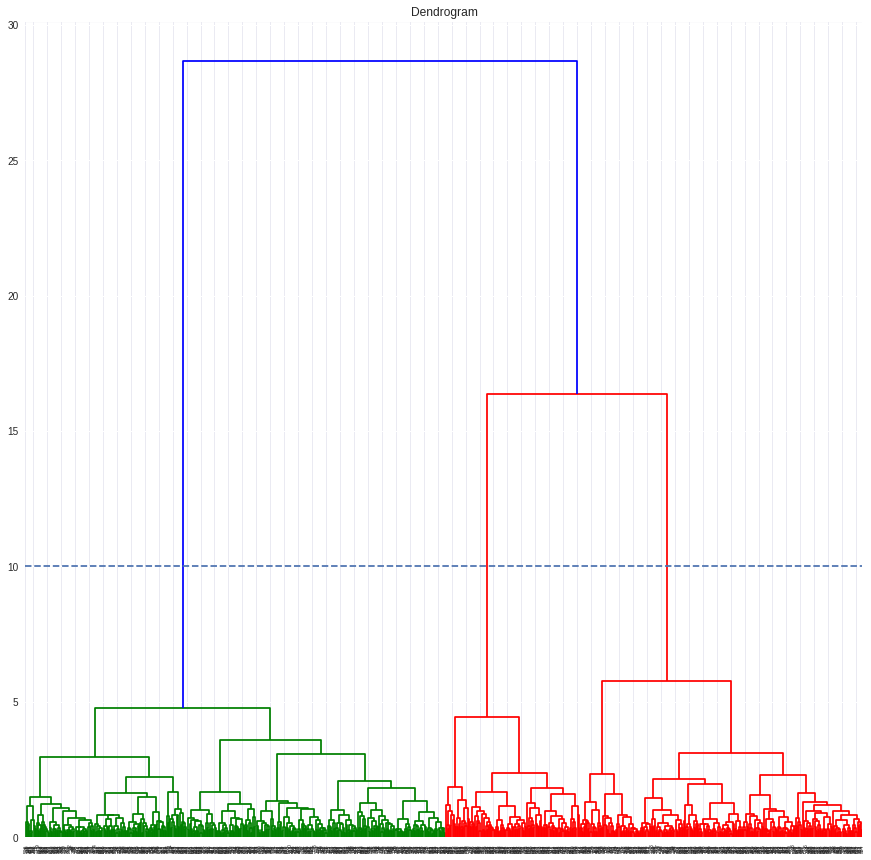

In [67]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,15))
plt.title('Dendrogram')
plt.axhline(y=10, linestyle='--')
dend = sch.dendrogram(sch.linkage(df_final, method='ward'))

In [68]:
from sklearn.cluster import AgglomerativeClustering as AC
cluster = AC(n_clusters=3) 

In [69]:
cluster.fit_predict(df_final)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1,
       1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1,
       1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [70]:
df_final['Cluster AC'] = cluster.fit_predict(df_final)
df_final

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster KM,Cluster AC
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,2,1
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,2,1
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,2,1
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,1,0
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778,2,1
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926,2,1
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111,2,1
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074,1,0


In [71]:
df_final['Cluster KM'].value_counts()

2    390
1    263
0    124
Name: Cluster KM, dtype: int64

In [72]:
df_final['Cluster AC'].value_counts()

1    390
0    263
2    124
Name: Cluster AC, dtype: int64

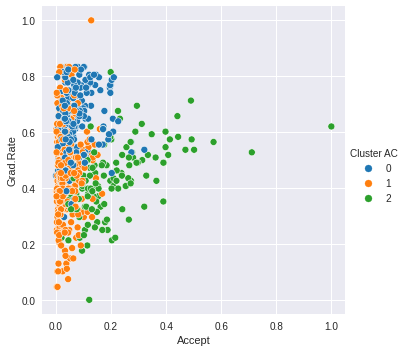

In [73]:
sns.relplot(x='Accept',y='Grad.Rate',data=df_final, hue='Cluster AC', palette='tab10')

In [74]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

siluet_km = silhouette_score(df_final, df_final['Cluster KM'])
siluet_ac = silhouette_score(df_final, df_final['Cluster AC'])

calinski_km = calinski_harabasz_score(df_final, df_final['Cluster KM'])
calinski_ac = calinski_harabasz_score(df_final, df_final['Cluster AC'])

dbi_km = davies_bouldin_score(df_final, df_final['Cluster KM'])
dbi_ac = davies_bouldin_score(df_final, df_final['Cluster AC'])

model_selection = pd.DataFrame({'Before PCA K Means':[siluet_km, calinski_km, dbi_km], 'Before PCA Agglomerative':[siluet_ac, calinski_ac, dbi_ac]},
                               index=['Silhouette Score', 'Calinski Score', 'Davies Bouldin Score'])

In [75]:
model_selection

,Before PCA K Means,Before PCA Agglomerative
Silhouette Score,0.645676,0.645676
Calinski Score,1975.299391,1975.299391
Davies Bouldin Score,0.507587,0.507587


## PCA

In [76]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_final.drop(['Cluster KM','Cluster AC'], axis=1))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

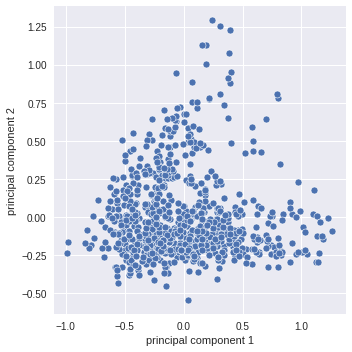

In [78]:
sns.relplot(x='principal component 1',y='principal component 2',data=principalDf, palette='tab10')

In [79]:
modelKM = KMeans(n_clusters=3, random_state=42)
modelKM.fit(principalDf)

KMeans(n_clusters=3, random_state=42)

In [80]:
principalDf['Cluster PCA KM'] = modelKM.predict(principalDf) 

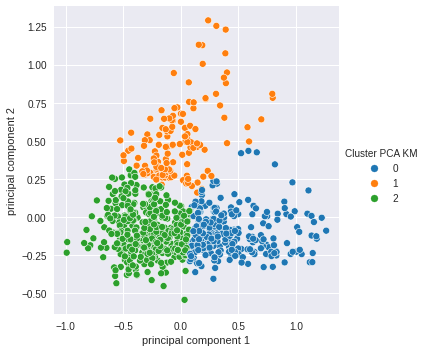

In [81]:
sns.relplot(x='principal component 1',y='principal component 2',data=principalDf, hue='Cluster PCA KM', palette='tab10')

In [82]:
modelKM.cluster_centers_

array([[ 0.43839733, -0.10476326],
       [-0.01799624,  0.50591505],
       [-0.28661185, -0.09957545]])

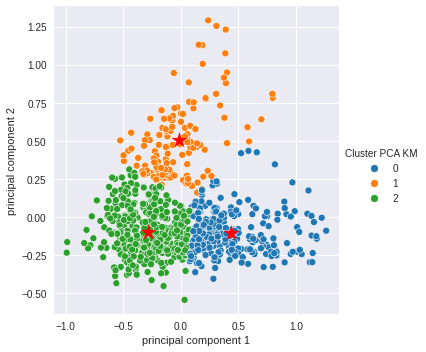

In [83]:
sns.relplot(x='principal component 1',y='principal component 2',data=principalDf, hue='Cluster PCA KM', palette='tab10')
plt.scatter(modelKM.cluster_centers_[:,0], modelKM.cluster_centers_[:,1], color='red', marker='*', s=250)

## Hierarchical

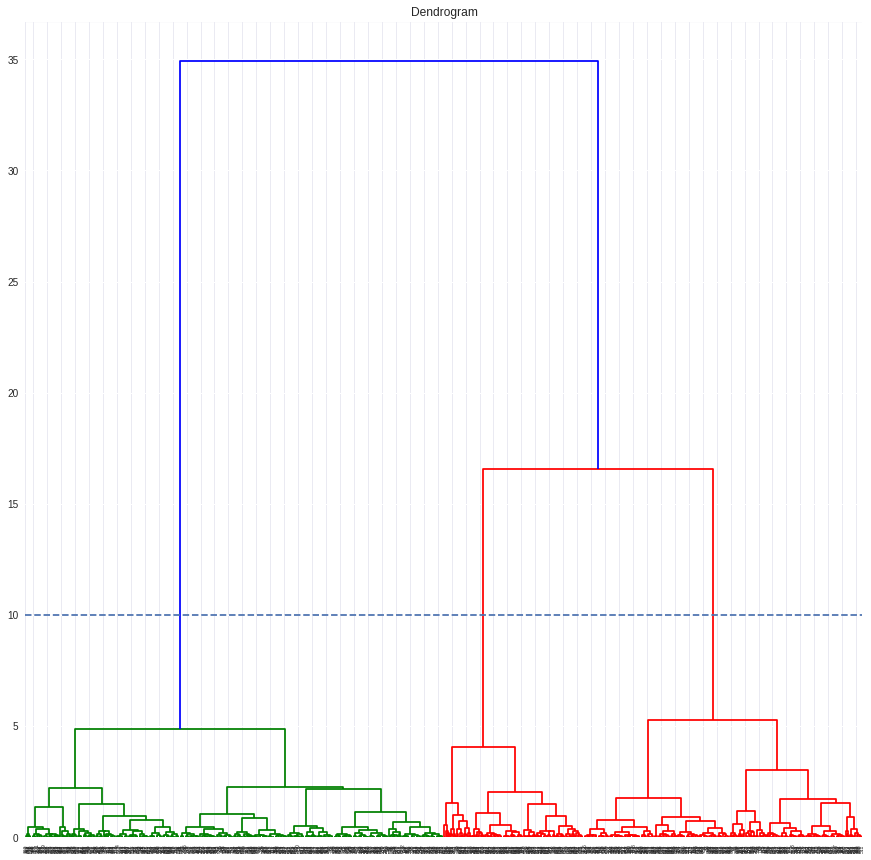

In [84]:
plt.figure(figsize=(15,15))
plt.title('Dendrogram')
plt.axhline(y=10, linestyle='--')
dend = sch.dendrogram(sch.linkage(principalDf, method='ward'))

In [85]:
cluster = AC(n_clusters=3)

In [86]:
cluster = AC(n_clusters=3) 
principalDf['Cluster PCA AC'] = cluster.fit_predict(principalDf)

In [87]:
principalDf['Cluster PCA KM'].value_counts()

2    388
0    259
1    130
Name: Cluster PCA KM, dtype: int64

In [88]:
principalDf['Cluster PCA AC'].value_counts()

1    388
0    259
2    130
Name: Cluster PCA AC, dtype: int64

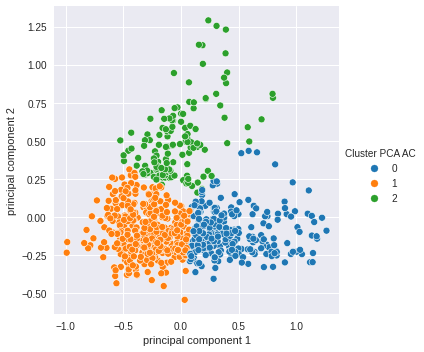

In [89]:
sns.relplot(x='principal component 1',y='principal component 2',data=principalDf, hue='Cluster PCA AC', palette='tab10')

In [90]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

siluet_km = silhouette_score(principalDf, principalDf['Cluster PCA KM'])
siluet_ac = silhouette_score(principalDf, principalDf['Cluster PCA AC'])

calinski_km = calinski_harabasz_score(principalDf, principalDf['Cluster PCA KM'])
calinski_ac = calinski_harabasz_score(principalDf, principalDf['Cluster PCA AC'])

dbi_km = davies_bouldin_score(principalDf, principalDf['Cluster PCA KM'])
dbi_ac = davies_bouldin_score(principalDf, principalDf['Cluster PCA AC'])

model_selection2 = pd.DataFrame({'After PCA K Means':[siluet_km, calinski_km, dbi_km], 'After PCA Agglomerative':[siluet_ac, calinski_ac, dbi_ac]},
                               index=['Silhouette Score', 'Calinski Score', 'Davies Bouldin Score'])
result = pd.concat([model_selection, model_selection2], axis=1)

In [91]:
result 

,Before PCA K Means,Before PCA Agglomerative,After PCA K Means,After PCA Agglomerative
Silhouette Score,0.645676,0.645676,0.802675,0.802675
Calinski Score,1975.299391,1975.299391,6263.841202,6263.841202
Davies Bouldin Score,0.507587,0.507587,0.307789,0.307789


In [93]:
pd.concat([df_final, principalDf[['Cluster PCA KM', 'Cluster PCA AC']]], axis=1)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,...,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster KM,Cluster AC,Cluster PCA KM,Cluster PCA AC
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,...,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,2,1,2,1
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,...,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,2,1,2,1
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,...,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,2,1,2,1
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,...,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,1,0,0,0
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,...,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,...,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778,2,1,2,1
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,...,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926,2,1,2,1
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,...,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111,2,1,2,1
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,...,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074,1,0,0,0


## Pengecekkan Nilai K

mencari nilai k

Text(0.5, 1.0, 'Elbow Method')

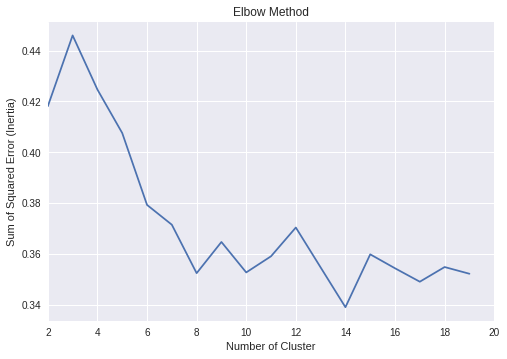

In [94]:
sil = []
for i in range(2,20):
  modelKM = KMeans(n_clusters=i)
  modelKM.fit(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1))
  y_pred = modelKM.predict(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1))
  sil.append(silhouette_score(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1), y_pred))

sns.lineplot(x=[i for i in range(2,20)], y=sil)
plt.xlim(2,20)
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.title('Elbow Method')

Text(0.5, 1.0, 'Elbow Method')

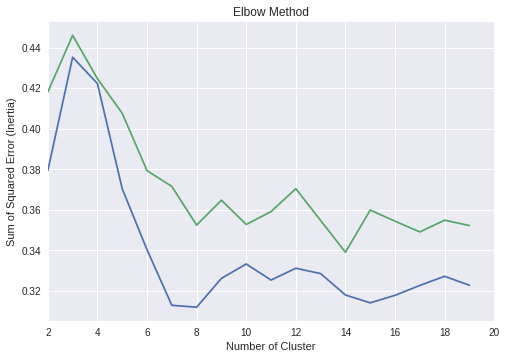

In [95]:
xxx = []
for i in range(2,20):
  modelKM = AC(n_clusters=i)
  y_pred = modelKM.fit_predict(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1))
  xxx.append(silhouette_score(principalDf.drop(['Cluster PCA KM','Cluster PCA AC'], axis=1), y_pred))

sns.lineplot(x=[i for i in range(2,20)], y=xxx)
sns.lineplot(x=[i for i in range(2,20)], y=sil)
plt.xlim(2,20)
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.title('Elbow Method')

kurang lebih nilai yang digunakan adalah 3